In [6]:
### Merged and extracted features ###
import pandas as pd

data_cpi_and_ex = pd.read_csv('../data/cpi_and_exchange_rate.csv', header=0).dropna()
data_gdp_and_ex = pd.read_csv('../data/gdp_and_exchange_rate.csv', header=0).dropna()

#print(data_cpi_and_ex)
#print(data_gdp_and_ex)

merged = pd.merge(data_cpi_and_ex, data_gdp_and_ex, on='half_year')
merged = merged.drop(columns=['ex_rate', 'exc_growth'])

features = merged[['cpi', 'inflation', 'GDP']]
targets  = merged['exchange_rate']

           cpi  inflation    GDP
0    67.631667   1.505212  10.65
1    68.649667   2.068473  12.20
2    70.069667   2.057952  11.90
3    71.511667   0.308108  10.40
4    71.732000   0.424729   6.20
5    72.036667   0.670955   8.10
6    72.520000   0.743243  10.30
7    73.059000   1.138806   4.90
8    73.891000   1.649276   7.60
9    75.109667  -1.461419   9.00
10   74.012000  -0.781855  -0.45
11   73.433333   0.392192  -3.80
12   73.721333   0.595486   3.80
13   74.160333   0.584320   7.55
14   74.593667   0.587628   8.45
15   75.032000   0.318531   9.65
16   75.271000  -0.287849   3.15
17   75.054333  -0.262921  -4.95
18   74.857000   0.017366   1.55
19   74.870000   0.232848   6.35
20   75.044333   0.283388   1.95
21   75.257000   0.825172   7.10
22   75.878000   0.715183  11.85
23   76.420667  -0.440544   8.00
24   76.084000   1.290241   5.70
25   77.065667   0.098185   9.00
26   77.141333   0.660692   9.65
27   77.651000  -0.168274   8.40
28   77.520333   3.885432   9.30
29   80.53

In [8]:
### Build machine learning model ###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(features, targets)

### Predicted exchange rate ###
predictions = model.predict(features)
mse = mean_squared_error(predictions, targets)

0.009783559575095784


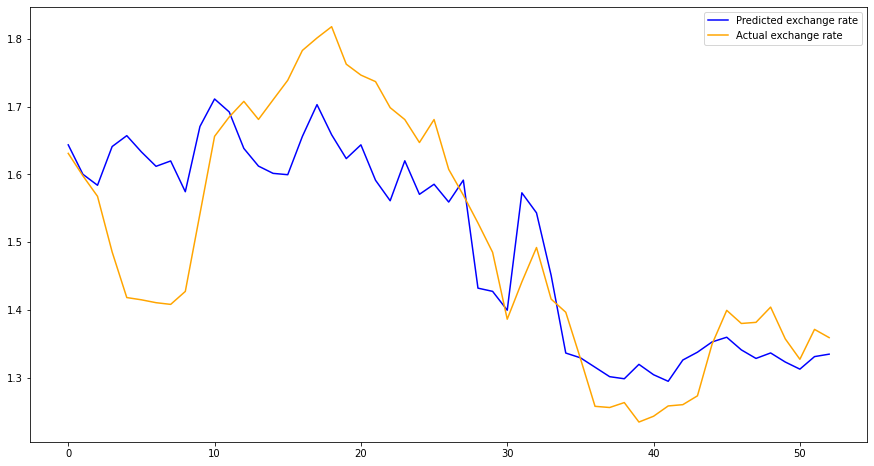

In [11]:
### visualize model graphically ###
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3)

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, Y_test)
print(mse)

0.011522560903556753


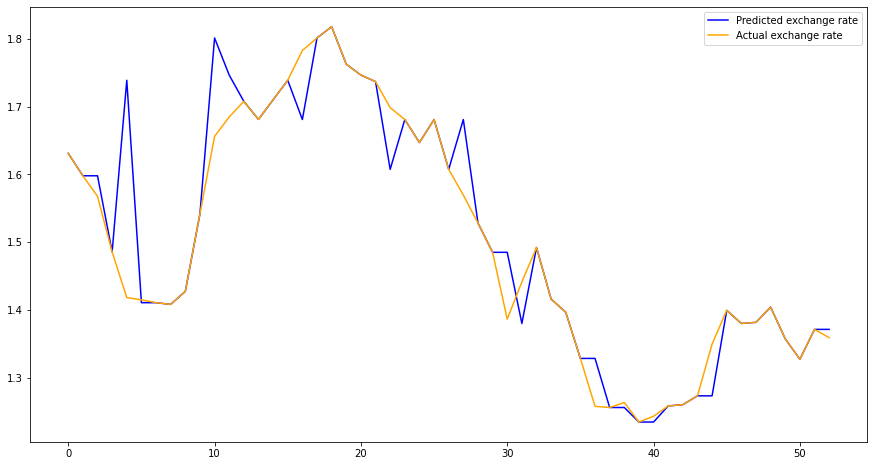

In [16]:
### visualize model graphically ###
import matplotlib.pyplot as plt

predictions = model.predict(features)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()